 # K-Means clustering from scratch

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

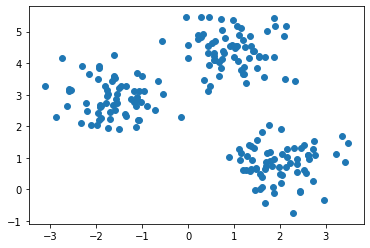

In [3]:
from sklearn.datasets.samples_generator import make_blobs     #Generating clusters

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=35)

In [4]:
d=X.shape[0] #No. of data points
n=X.shape[1] #No. of dimensions in data
k=3 #number of clusters
centroids=np.array([]).reshape(n,0)

# assigning initial centroids

In [5]:
for i in range(k):
    rnum=random.randint(0,d-1)
    centroids=np.c_[centroids,X[rnum]]

# euclidian distances from centroids

In [6]:
def nearby_centroids(data,centroids,k):
    euclidist=np.array([]).reshape(len(data),0)
    for j in range(k):
        tmp=np.sum((data-centroids[:,j])**2,axis=1)
        euclidist=np.c_[euclidist,tmp]
    nearest=np.argmin(euclidist,axis=1)+1
    return nearest

# assigning clusters to data points

In [7]:
def clustering(data,k,nearby):
    tmpcluster={}
    centroids=np.zeros([data.shape[1],k])
    for p in range(k):
        tmpcluster[p+1]=np.array([]).reshape(2,0)
    for q in range(len(data)):
        tmpcluster[nearby[q]]=np.c_[tmpcluster[nearby[q]],data[q]]
    for r in range(k):
        tmpcluster[r+1]=tmpcluster[r+1].T
    for s in range(k):
        centroids[:,s]=np.mean(tmpcluster[s+1],axis=0)
        
    return centroids,tmpcluster

# converging our algorithm

In [8]:
nearby1=nearby_centroids(X,centroids,k)
centroids2,group1=clustering(X,k,nearby1)
nearby2=nearby_centroids(X,centroids2,k)
centroids3,group2=clustering(X,k,nearby2)

changed=True
def convergence(group2,group1,k):
    changed=False
    for u in range(k):
        if (len(group1[u+1])!=len(group2[u+1])):
                changed=True
                break
        else :
                for v in range(len(group1[u+1])):
                    if (all(group1[u+1][v]==group2[u+1][v])==False):
                        changed=True
                        break

    return changed

while (convergence(group2,group1,k)==True):
    nearby1=nearby2
    centroids2,group1=centroids3,group2
    nearby2=nearby_centroids(X,centroids2,k)
    centroids3,group2=clustering(X,k,nearby2)
    
final_centroids,final_cluster=centroids3,group2


# Plotting the results

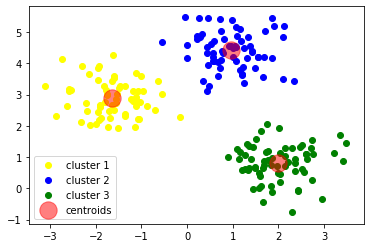

In [9]:
colors=['yellow','blue','green']
labels=['cluster 1','cluster 2','cluster 3']
for r in range(k):
    plt.scatter(final_cluster[r+1][:,0],final_cluster[r+1][:,1],c=colors[r],label=labels[r])
plt.scatter(final_centroids[0,:],final_centroids[1,:],s=300,alpha=0.5,c='red',label='centroids')
plt.legend()
plt.show()

In [10]:
#Rough
final_centroids

array([[-1.64579109,  0.96362733,  2.00041564],
       [ 2.89383733,  4.41519955,  0.81813071]])